In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Make csv files with only the necessary Columns for ML

In [ ]:
for year in range(1980, 2022):
    path = "with_number_of_weeks/years/" + str(year) + ".csv"

    df = pd.read_csv(path)
    artist_id = pd.read_csv('artist_weeks_data.csv')

    keys = list(artist_id['artist'])
    values = list(artist_id['artist_id'])
    artist_id = dict(zip(keys, values))

    artist = []
    arr = df['spotify_artist'].to_numpy().astype(str)
    arr = np.char.rstrip(arr, "']")
    arr = np.char.lstrip(arr, "['")
    arr = np.char.split(arr, "', '")
    for i, a_list in enumerate(arr):
        if a_list[0] in artist_id:
            artist.append(artist_id[a_list[0]])
        else:
            artist_id[a_list[0]] = len(artist_id) + 1
            artist.append(artist_id[a_list[0]])
    df['spotify_id'] = artist

    df = df[['spotify_id', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'weeks']]
    df.columns = ['artist_id', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'weeks']
    df.to_csv("final_csv/" + str(year) + ".csv")

CSV file for visualization

In [ ]:
mdf = pd.DataFrame(columns= ['year', 'danceability', 'energy', 'key' , 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'])

for year in range(1980, 2022):

    path = f"final_csv/{year}.csv"
    df = pd.read_csv(path, ).iloc[:, 2:-1]
    df.mean()
    mdf = mdf.append(df.mean(), ignore_index=True)
mdf['year'] = np.arange(1980, 2022).astype(int)


In [ ]:
ml_df = pd.read_csv("ml_accuracy.csv").iloc[:, 1:]
pd.concat([mdf, ml_df], axis = 1).to_csv('vis_data.csv')

In [23]:
df = pd.read_csv('csv_files/plot_data.csv').iloc[:, 1:]
x = df['year']
y1 = df.iloc[:, -3]
y2 = df.iloc[:, -2]
y3 = df.iloc[:, -1]
df.columns

Index(['year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'accuracy', 'recall', 'precision'],
      dtype='object')

Text(0.5, 0, 'year')

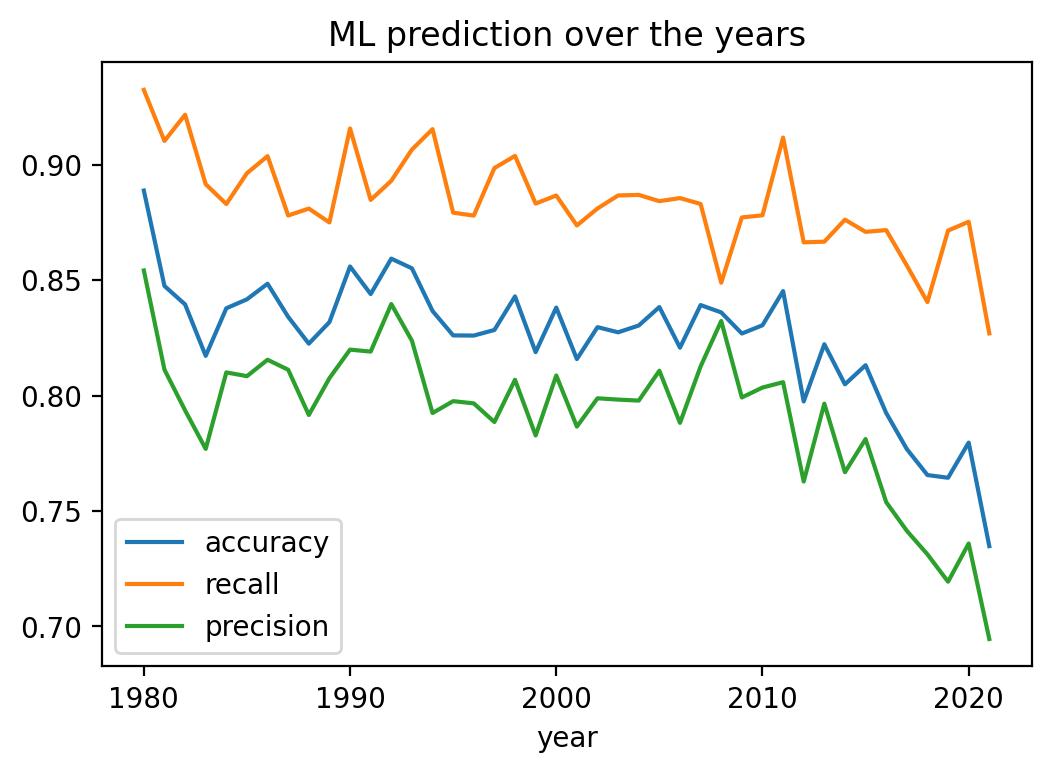

In [30]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['accuracy', 'recall', 'precision'])
plt.rcParams['figure.dpi'] = 200
plt.title('ML prediction over the years')
# plt.ylabel('Danceability')
plt.xlabel('year')
